<a href="https://colab.research.google.com/github/Ratnasari124/PCVK_RATNASARI_2024/blob/main/week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PCVK JOBSHEET 10

Thresholding, Segmentasi Sederhana

---



Nama : Ratnasari

NIM : 2241720007

Kelas : TI 3D

---



link jobsheet : https://drive.google.com/file/d/1KGm56YHLEzlvZKjaTqmLJIR1TvnPILZ2/view?pli=1

link github : https://github.com/Ratnasari124/PCVK_RATNASARI_2024/blob/main/week10.ipynb

# PRAKTIKUM

1. Import folder Drive

---



In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2. Import Library

---



In [8]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

3. Buat Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO, TOZERO_INV), dengan
threshold= 170, secara manual sesuai dengan deskripsi dari grafik yang ditunjukkan di
atas.

---



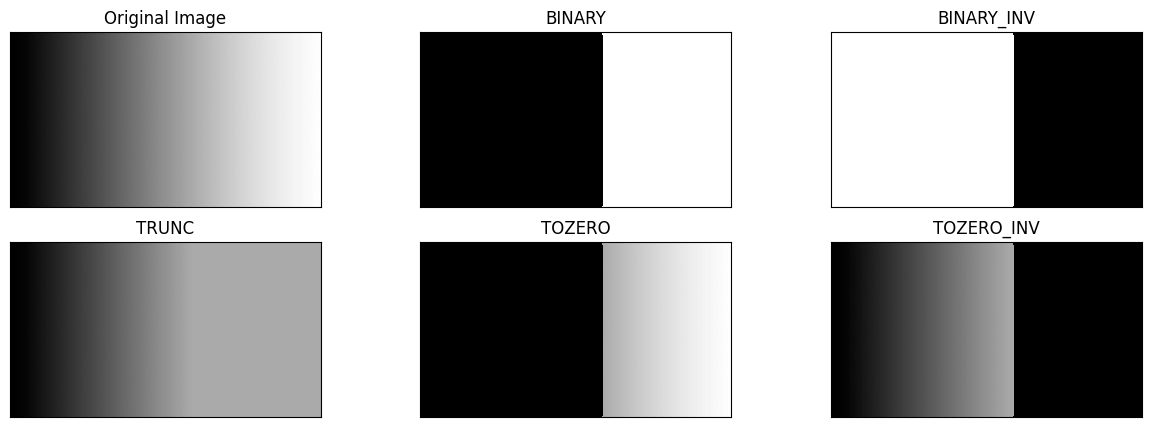

In [20]:
img = cv.imread('/content/drive/MyDrive/ratna/Images/gradient.jpg')

thresh = 170 #nilai Threshold yang ditentukan
#1. thresh1 jika pixel di img>127, maka thresh1 bernilai 1(putih) selain itu bernilai 0(hitam)
ret,thresh1 = cv.threshold(img,thresh,255,cv.THRESH_BINARY)
#2. thresh2 adalah binary threshold inverse
ret,thresh2 = cv.threshold(img,thresh,255,cv.THRESH_BINARY_INV)
#3. Threshold Truncate
ret,thresh3 = cv.threshold(img,thresh,255,cv.THRESH_TRUNC)
#4. Threshold Tozero
ret,thresh4 = cv.threshold(img,thresh,255,cv.THRESH_TOZERO)
#5. Threshold Tozero Inverse

ret,thresh5 = cv.threshold(img,thresh,255,cv.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize = (15,5))
for i in range(len(images)):
  plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show()

4. Buat Otsu Thresholding tanpa menggunakan Library. Tampilkan juga nilai threshold
saat anda gunakan Otsu’s, seperti terlihat pada gambar hasil berikut. (gunakan image
balloon.jpg agar terlihat beda antara hasil otsu’s dengan global threshold biasa)

---



<ipython-input-24-06eceb7792cc>:19: RuntimeWarning: invalid value encountered in divide
  mb = sumb / wb


<Figure size 1500x500 with 0 Axes>

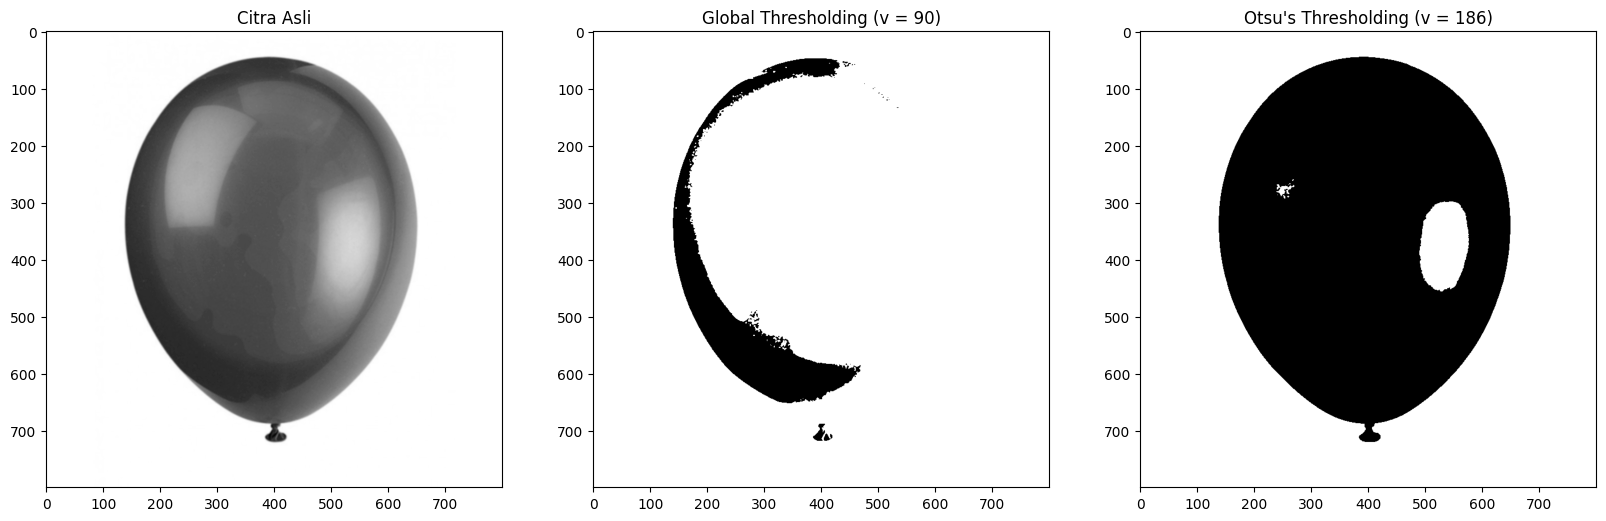

In [24]:
imgn4 = cv.imread('/content/drive/MyDrive/ratna/Images/balloon.jpg',0)
# Hitung nilai threshold menggunakan Otsu Thresholding secara manual
img4_gray = cv. GaussianBlur (img4, (5,5),0)

histogrm = cv.calcHist([img4_gray],[0],None,[256], [0,256])
hist_norm = histogrm.ravel()/histogrm.max()
Q = hist_norm.cumsum()
bins = np.arange (256)
wb = 0
sumb = 0
variationmax = 0
fn_min = np.inf
thresh = -1
for i in range(0,187):
  wb += histogrm[i]
  wf = (img4_gray.shape[0]*img4_gray.shape[1]) - wb
  sumb += (i*histogrm[i])
  mb = sumb / wb
  mf = (sumb - sumb)/wf
  varbetween = wb * wf * (mb - mf) * (mb - mf)
  if (varbetween>variationmax):
    variationmax = varbetween
    thresh = i
x = ("Otsu's Thresholding (v = ")+str(thresh)+")"
ret, th1 = cv.threshold(img4_gray, 90, 255, cv.THRESH_BINARY)
ret, th2 = cv.threshold (img4_gray, thresh, 255, cv. THRESH_BINARY)

titles = ['Citra Asli', 'Global Thresholding (v = 90)', x]
citra3 = [img4_gray, th1, th2]
plt.figure(figsize = (15,5))

plt. figure(figsize = (20,15))
for i in range(len(citra3)):
    plt. subplot(1,3,i+1),plt.imshow(citra3[i], 'gray')
    plt.title(titles[i])
plt.show()

5. Buat histogram dari citra tersegmentasi, Histogram hanya pada foreground image
saja. Gunakan image tobacco.jpg yang sudah disediakan di folder images.
Petunjuk:

a. anda dapat gunakan cv.calcHist untuk menampilkan histogram.

b. Buka link berikut https://opencv-
tutorial.readthedocs.io/en/latest/histogram/histogram.html

c. Dari link tersebut perhatikan bahwa cv.calcHist memiliki salah satu parameter
yaitu mask. Jika diset None, maka keseluruhan image akan dihitung
histogramnya. Jika kita tentukan mask, maka hanya bagian image yang
dimasking warna putih yang akan dihitung histogramnya (dari contoh
dibawah dinamakan dengan Citra Segment).

---



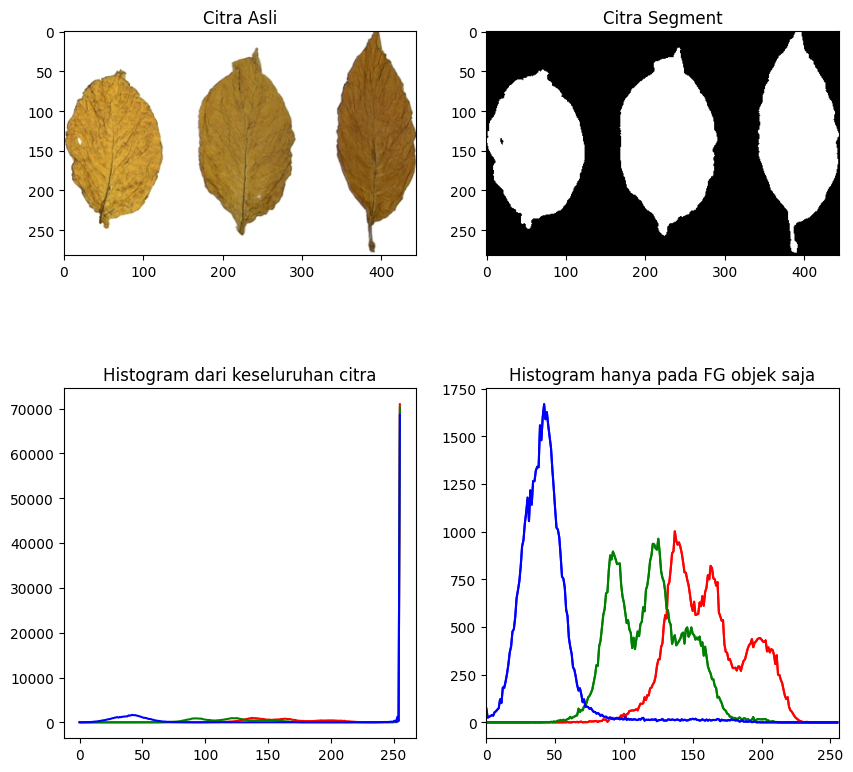

In [25]:
# Histogram dari citra tersegmentasi
# load image in BGR format
img = cv.imread('/content/drive/MyDrive/ratna/Images/tobacco.jpg')
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

ret3,mask = cv.threshold(img_gray,200,255,cv.THRESH_BINARY_INV)

plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.imshow(img)
plt.title('Citra Asli')
plt.subplot(2,2,2),plt.imshow(mask, 'gray')
plt.title('Citra Segment')
color = ('r','g','b')
for i,col in enumerate(color):
    hist0 = cv.calcHist([img],[i],None,[256],[0,256])
    plt.subplot(2,2,3),plt.plot(hist0,color = col)
    plt.title('Histogram dari keseluruhan citra')
    hist1 = cv.calcHist([img],[i],mask,[256],[0,256])
    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram dari keseluruhan citra')
    hist1 = cv.calcHist([img],[i],mask,[256],[0,256])
    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram hanya pada FG objek saja')
    plt.xlim([0,256])
plt.show()


6. Lakukan segmentasi warna pada image "peppers.jpg", munculkan hanya warna yang
kuning saja. (Petunjuk: anda dapat gunakan K-Means untuk menampilkan hanya
warna tertentu saja)

---



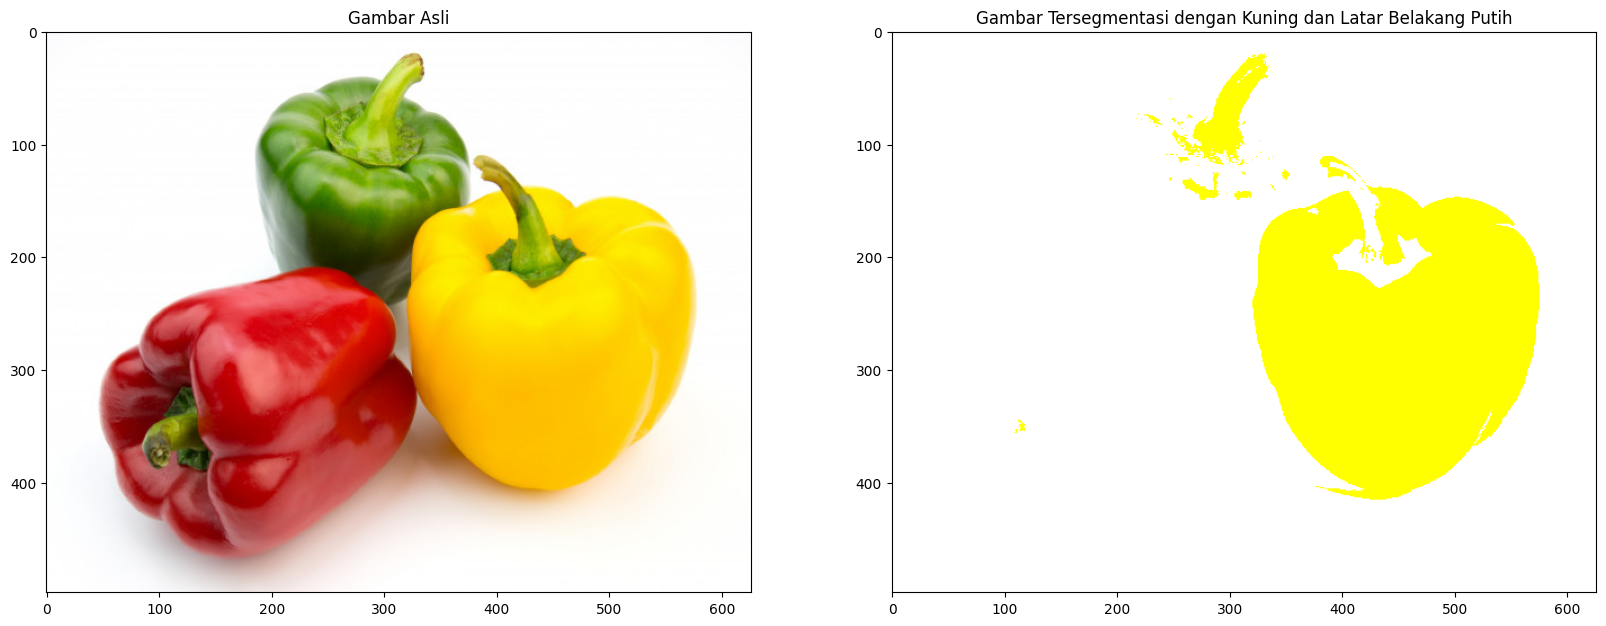

In [98]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load image
filename = '/content/drive/MyDrive/ratna/Images/peppers.jpg'
img = cv.imread(filename)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Reshape and convert to float
pixel_values = img.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

# Define criteria and apply KMeans
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 3
_, labels, centers = cv.kmeans(pixel_values, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

# Convert centers to uint8
centers = np.uint8(centers)

# Modify centroid colors
# Assuming the yellow centroid is at index 0
# You can determine the correct index by checking the values in centers
# Here we just assume that the index for yellow is 0
yellow_centroid = [255, 255, 0]  # Kuning
centers[0] = yellow_centroid

# Change other centroids to white
for i in range(1, k):
    centers[i] = [255, 255, 255]  # Putih

# Create segmented image
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(img.shape)

# Ubah semua piksel selain kuning menjadi putih
# Mask untuk mengubah area bukan kuning menjadi putih
mask = np.all(segmented_image == yellow_centroid, axis=-1)
segmented_image[~mask] = [255, 255, 255]  # Ganti yang bukan kuning menjadi putih

# Display results
plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 1), plt.imshow(img)
plt.title('Gambar Asli')
plt.subplot(1, 2, 2), plt.imshow(segmented_image)
plt.title('Gambar Tersegmentasi dengan Kuning dan Latar Belakang Putih')
plt.show()


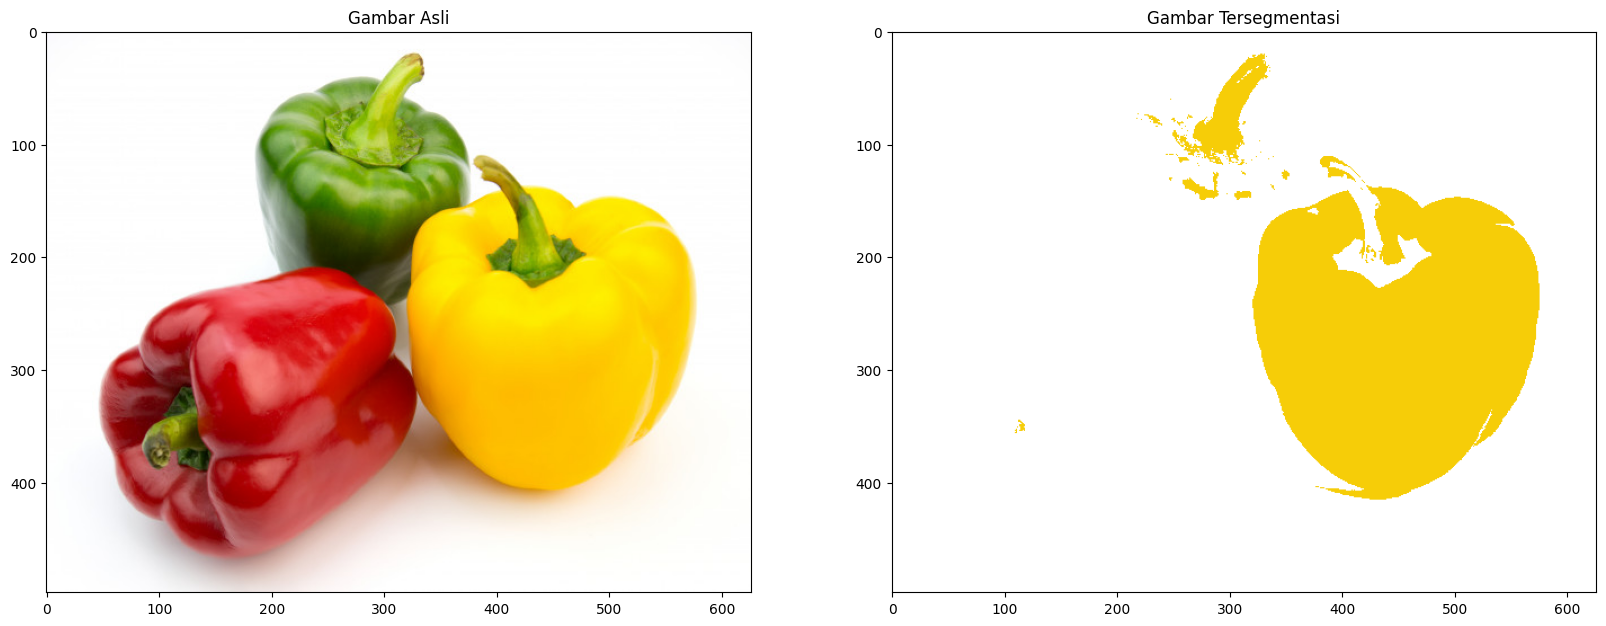

In [104]:
# Load image
filename = '/content/drive/MyDrive/ratna/Images/peppers.jpg'
img = cv.imread(filename)
# Convert to RGB for displaying with Matplotlib
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Reshape the image data and convert to float32 for KMeans processing
pixel_values = img.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

# Define criteria and apply KMeans to segment colors
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 3  # Number of clusters
_, labels, centers = cv.kmeans(pixel_values, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

# Convert the centers to uint8 (standard image format)
centers = np.uint8(centers)

    # Identify the cluster closest to yellow (255, 255, 0)
distances = np.linalg.norm(centers - [255, 255, 0], axis=1)
yellow_index = np.argmin(distances)
yellow_centroid = centers[yellow_index]

    # Set non-yellow clusters to white
for i in range(k):
  if i != yellow_index:
    centers[i] = [255, 255, 255]  # White for non-yellow clusters

# Map the labels back to image with updated center colors
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(img.shape)

    # Create mask to retain only yellow areas
mask = np.all(segmented_image == yellow_centroid, axis=-1)
segmented_image[~mask] = [255, 255, 255]  # Set non-yellow to white

# Display results
plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 1), plt.imshow(img)
plt.title('Gambar Asli')
plt.subplot(1, 2, 2), plt.imshow(segmented_image)
plt.title('Gambar Tersegmentasi')
enplt.show()

Saat anda menampilkan warna tertentu, jelaskan kendala yang di hadapi dan mengapa
hal itu terjadi.

---

kendala nya adalah untuk pemetaan warna kuningnya jadi binggung nulis kodenya, jadi perlu paham logika untuk kode menampilkan warna nya. ini ada 2 versi warna yang dihasilkan tidak bisa mirip dengan yang dicontoh.

7. Buka File crossword.jpg. Dengan pengetahuan tentang thresholding yang sudah anda
pelajari. Lakukan thresholding biner dengan hasil terbaik menurut anda. Copas code
dan hasil image di modul ini.

---



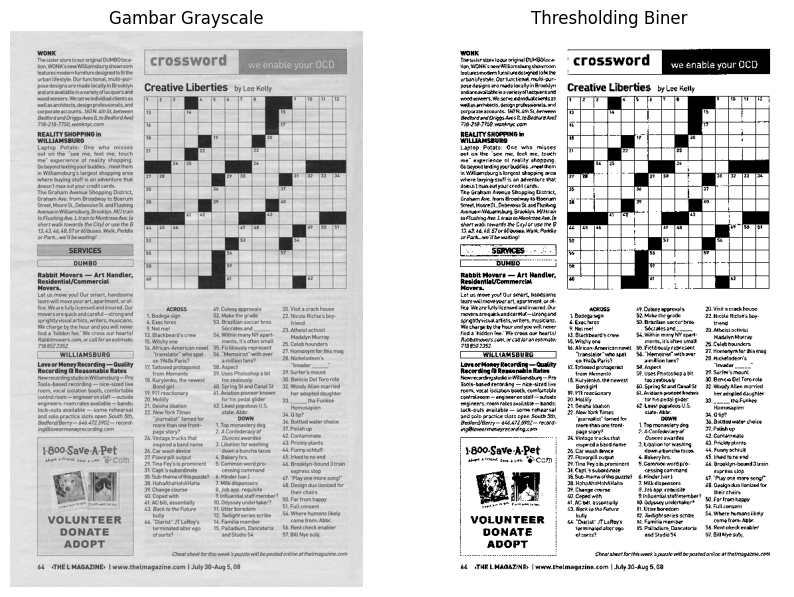

False

In [52]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Membaca gambar
filename = '/content/drive/MyDrive/ratna/Images/crossword.jpg'
img = cv.imread(filename)

# Mengubah gambar ke grayscale
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Menerapkan Otsu's thresholding
# Pertama, kita menggunakan cv.threshold untuk menerapkan thresholding
# Fungsi ini juga dapat digunakan untuk Otsu's thresholding
ret, binary_threshold = cv.threshold(gray, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# Menampilkan hasil
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(gray, cmap='gray')
plt.title('Gambar Grayscale')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(binary_threshold, cmap='gray')
plt.title('Thresholding Biner')
plt.axis('off')

plt.show()

# Menyimpan hasil (opsional)
cv.imwrite('/content/drive/MyDrive/ratna/Images/crossword.jpg', binary_threshold)


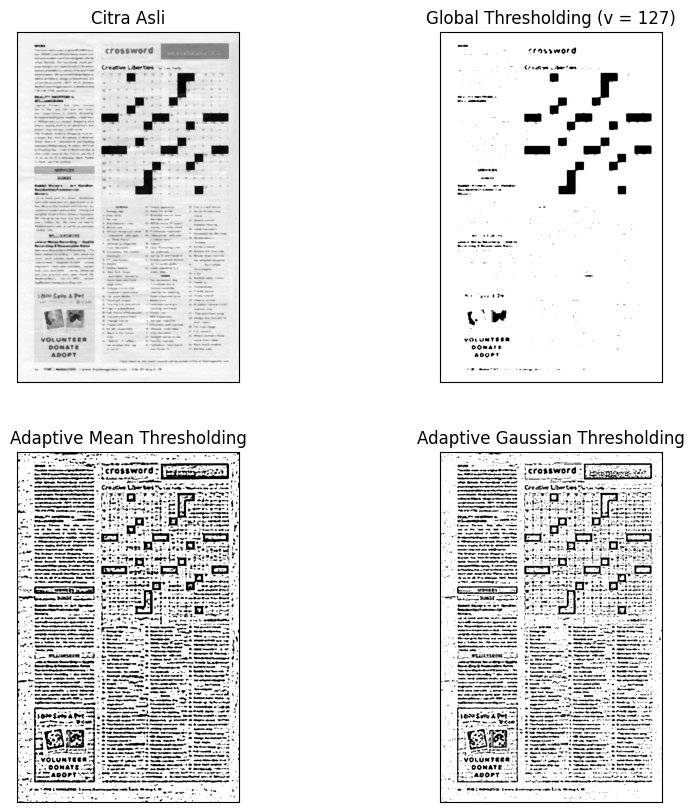

In [51]:
import cv2 as cv
import matplotlib.pyplot as plt

# Load image
filename = '/content/drive/MyDrive/ratna/Images/crossword.jpg'
citra = cv.medianBlur(cv.imread(filename), 5)

# Convert to grayscale
gray = cv.cvtColor(citra, cv.COLOR_BGR2GRAY)

# Thresholding
thresh = 127
ret, th1 = cv.threshold(gray, thresh, 255, cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(gray, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 11, 2)
th3 = cv.adaptiveThreshold(gray, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 11, 2)

# Titles for the subplots
titles = ['Citra Asli', 'Global Thresholding (v = 127)', 'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
citra2 = [gray, th1, th2, th3]

# Plotting
plt.figure(figsize=(10, 10))

for i in range(len(citra2)):
    plt.subplot(2, 2, i + 1)
    plt.imshow(citra2[i], cmap='gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()
